In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
from matplotlib import style

data = pd.read_csv("Downloads/archive/music_album_reviews.csv")
print(data.tail())

                                                  Review  Rating
80266  my favorites here are the steamy lady cab driv...     3.0
80267  prince would have been well-advised to make th...     4.5
80268  you know you cannot say its not a classic beca...     3.5
80269                          the classic prince album.     5.0
80270  i do not like funk and i do not like prince. t...     1.0


In [3]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub('\n*', '',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    
    text = [word for word in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", word)]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)
data["Review"]


KeyboardInterrupt



In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]

data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data = data[["Review", "Positive",
             "Negative", "Neutral"]]
print(data.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  think actual underr ok comput anyth bonker rig...     0.208     0.112   
1  get radiohead rub lot peopl wrong way lot peop...     0.207     0.071   
2  would like think good let wider critic world a...     0.223     0.062   
3  radiohead devote like bowi devote find unexpec...     0.219     0.081   
4  wrote shine excel review album browser went nu...     0.189     0.141   

   Neutral  
0    0.681  
1    0.723  
2    0.716  
3    0.700  
4    0.670  


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob

def polarity(Review):
    if isinstance(Review, str):  # Ensure it's a string
        return TextBlob(Review).sentiment.polarity
    else:
        return 0  # Neutral sentiment for missing values

data["polarity"] = data['Review'].apply(polarity)
data.head(10)

,Review,Rating,polarity
0,i think i actually under-rate ok computer if a...,5.0,0.195115
1,i get why radiohead rub a lot of people the wr...,5.0,0.213229
2,i would like to think i am good about not lett...,4.5,0.263702
3,there are radiohead devotees like there were o...,4.0,0.135962
4,i wrote a shining excellent review for this al...,5.0,0.179547
5,hurrah finally i had my first radiohead experi...,2.5,0.236250
6,radiohead i nigel godrich wytworzyli prawdziwi...,5.0,0.000000
7,so let me get this straight. a bunch of one-hi...,2.5,0.069118
8,i can sort of understand the praise this album...,2.0,-0.045513
9,i can see a few progressive rock elements in t...,2.0,0.081369


In [8]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

data['sentiment']= data['polarity'].apply(sentiment)
data.head(10)


,Review,Rating,polarity,sentiment
0,i think i actually under-rate ok computer if a...,5.0,0.195115,Positive
1,i get why radiohead rub a lot of people the wr...,5.0,0.213229,Positive
2,i would like to think i am good about not lett...,4.5,0.263702,Positive
3,there are radiohead devotees like there were o...,4.0,0.135962,Positive
4,i wrote a shining excellent review for this al...,5.0,0.179547,Positive
5,hurrah finally i had my first radiohead experi...,2.5,0.236250,Positive
6,radiohead i nigel godrich wytworzyli prawdziwi...,5.0,0.000000,Neutral
7,so let me get this straight. a bunch of one-hi...,2.5,0.069118,Positive
8,i can sort of understand the praise this album...,2.0,-0.045513,Negative
9,i can see a few progressive rock elements in t...,2.0,0.081369,Positive


<Axes: xlabel='sentiment', ylabel='count'>

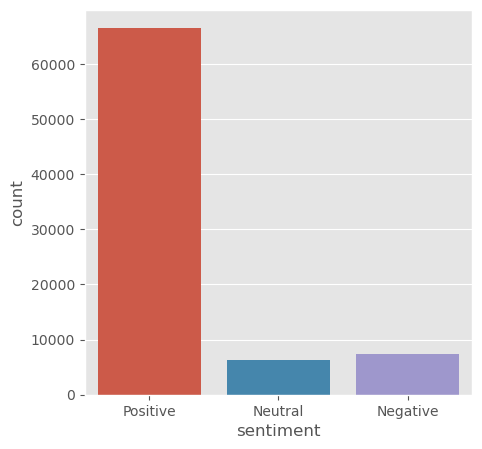

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=data)


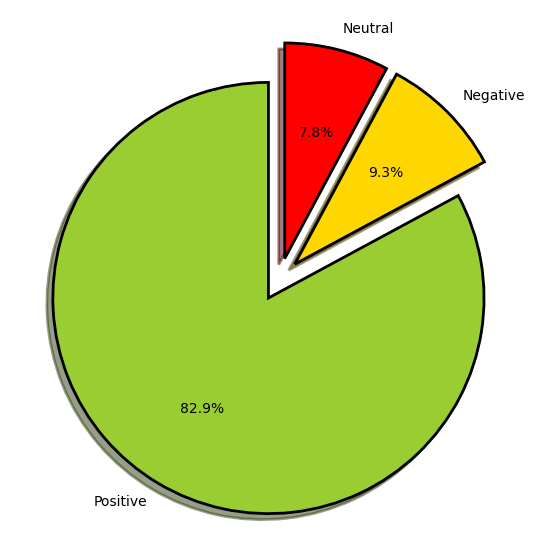

In [10]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={ 'linewidth':2,'edgecolor':"black"}
tags=data['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow=True,colors=colors, startangle=90, wedgeprops= wp,explode=explode,label='')
plt.title=('Distribution of sentiments')

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


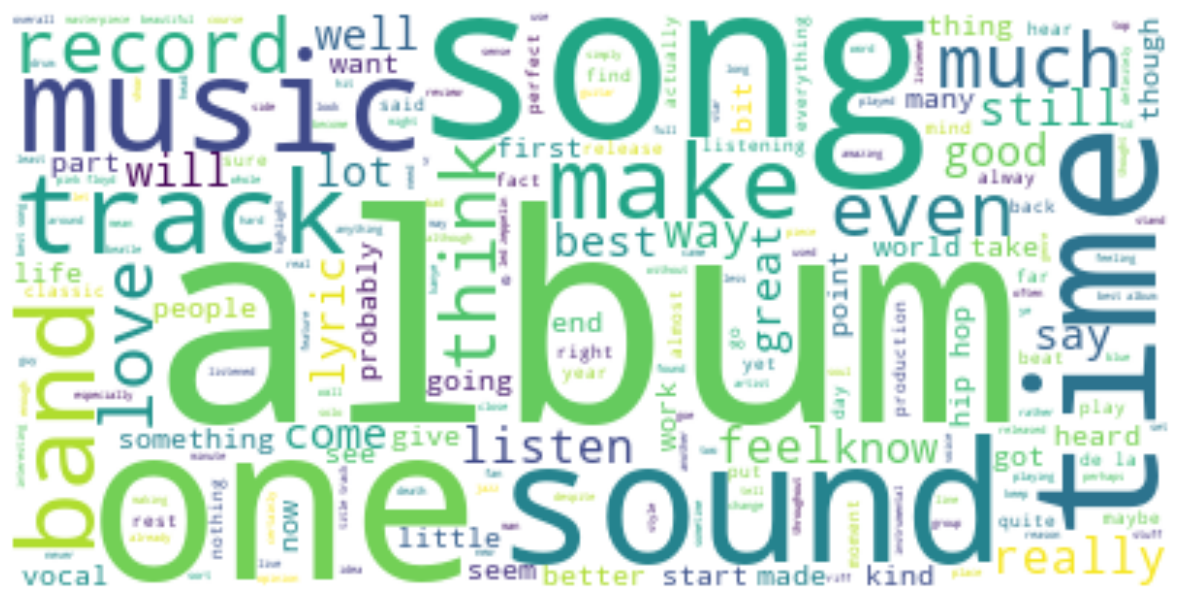

In [15]:
text = " ".join(str(i) for i in data.Review if isinstance(i, str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
data['Review'] = data['Review'].fillna('')
#vect=CountVectorizer().fit(data['Tweet'])
vect=CountVectorizer()
vect.fit(data['Review'])
feature_names=vect.get_feature_names_out()
print("no of features: {}\n".format(len(feature_names)))
print("first 100 features:\n {}".format(feature_names[:100]))

no of features: 207187

first 100 features:
 ['00' '000' '0000' '0001' '001' '0011110010110111101110101011' '003' '004'
 '0041' '0047' '005' '007' '00er' '00s' '01' '010' '0100'
 '01011011100110011101110011001011000010000' '01012020' '011'
 '01100111011010010111011001' '01101100001000000111011101101001011011000'
 '0112' '012' '01212ypoiw' '0126' '013' '014' '0140' '016' '018' '02'
 '021' '02122012' '022' '0224' '0226' '023' '024' '025' '02500' '0251'
 '026' '028' '029' '03' '030' '030211' '03022012' '0304' '03112008' '0313'
 '0315' '032' '035' '0350' '0353' '037' '037034' '038' '04' '040' '041'
 '0410' '04121993' '04133017' '04152020' '042' '04202008' '04202020' '043'
 '044' '044042' '045' '048' '049' '04th' '05' '050' '05012010' '0506'
 '051' '052' '0520' '052011' '05282006' '053' '055' '056' '057' '06'
 '061105' '065' '06s' '07' '070' '07072018' '0708' '07082005' '0710']


In [19]:
X=data['Review']
Y=data['sentiment']
X=vect.transform(X)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(64216, 207187)
(64216,)
(16055, 207187)
(16055,)


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

logreg.fit(x_train, y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

92.88072251635005


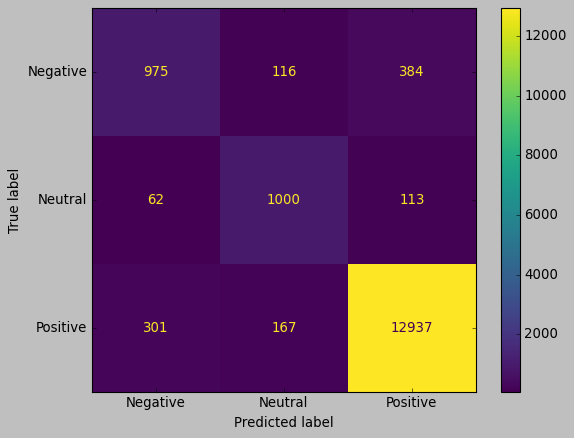

In [24]:
style.use('classic')
cm=confusion_matrix(y_test,logreg_pred,labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=logreg.classes_)
disp.plot()

In [25]:
#SupportVectorClassification
from sklearn.svm import LinearSVC
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [26]:
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print(svc_acc*100)

92.69386483961382


In [27]:
#Bernouli's Naive Bayes

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)

BNB_pred=BNBmodel.predict(x_test)
BNB_acc=accuracy_score(BNB_pred,y_test)
print(BNB_acc*100)

79.73217066334475


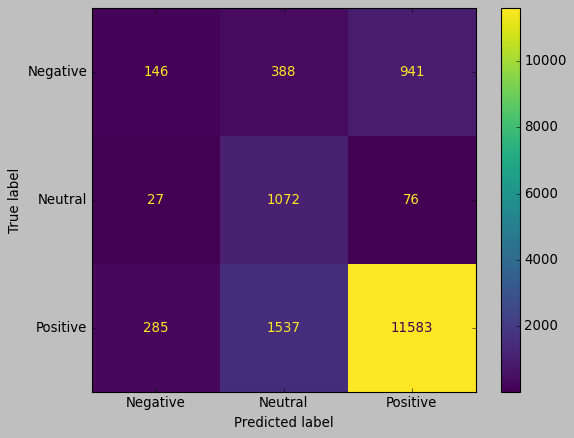

In [28]:
style.use('classic')
cm=confusion_matrix(y_test,BNB_pred,labels=BNBmodel.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=BNBmodel.classes_)
disp.plot()

In [32]:
git init
git add .
git commit -m "Initial commit - Sentiment Analysis Project"
git branch -M main
git remote add origin https://github.com/i-haribabu/Sentiment-Analysis.git
git push -u origin main

SyntaxError: invalid syntax (70714921.py, line 1)